c:\Users\umber\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\umber\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:917: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.asarray(values, dtype=dtype)


'\nx_train_sv, x_test_sv, y_train_sv, y_test_sv = train_test_split(X_smote, y_smote, test_size=0.15)\nmodel = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state=42)\nmodel.fit(x_train_sv, y_train_sv)\npredictions = model.predict(x_test_sv)\n\nprint(classification_report(y_test_sv, predictions))\n\nrf_classifier = RandomForestClassifier()\n\n# Esegui la cross-validation con 5 fold\nscores = cross_val_score(rf_classifier, X_smote, y_smote, cv=5)\n\n# Stampiamo i punteggi ottenuti dalla cross-validation\nprint("Punteggi della cross-validation:", scores)\n\n# Calcola la media dei punteggi\nprint("Media dei punteggi:", scores.mean())\n'

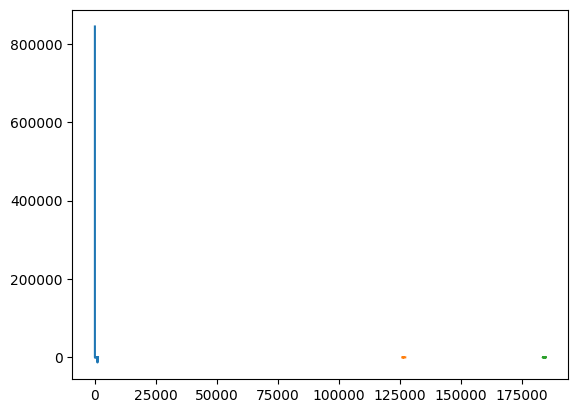

In [8]:
# ALLENAMENTO CON PEAKS
import numpy as np
import pywt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from scipy.fft import rfft
from scipy.fft import fft

from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pandas as pd
from imblearn.over_sampling import SMOTE



from sklearn.metrics import classification_report
df = pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_train_finale.csv")
#df = df.groupby('Case').head(400)
df = pd.concat([df]*2, ignore_index=True)

x_test=pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_test_finale.csv")
df = df[["Case","Condition","P1","P2","P3","P4","P5","P6","P7"]]
#ALLENAMENTO MODELLO
test = x_test[["P1","P2","P3","P4","P5","P6","P7"]]
X=df[["P1","P2","P3","P4","P5","P6","P7"]]

df_train = pd.DataFrame()
peaks_train = {}


for colonna in X.columns:
    df_train[colonna+"_FFT"] = rfft(X[colonna].values)



num_rows = len(df_train)
case_values = []
current_case = 1
for i in range(num_rows):
    case_values.append(current_case)
    if (i + 1) % 1201 == 0:
        current_case += 1


# Aggiungi la colonna "case" al dataframe
df_train['case'] = case_values

df1 = df_train[df_train['case'] == 1]
df106 = df_train[df_train['case'] == 106]
df154 = df_train[df_train['case'] == 154]
plt.plot(df1["P1_FFT"])
#plt.plot(df106["P1_FFT"])
#plt.plot(df154["P1_FFT"])


occurrences = df_train['case'].value_counts()

filtered_df = df_train[df_train['case'] == 2]

# Print the filtered dataframe
#print(filtered_df)

# Stampare il risultato
#print(occurrences)


last_col_index = len(df_train.columns) - 1

for colonna in df_train.columns[:last_col_index]:
    peaks_train[colonna+"peaks"] = find_peaks(df_train[colonna], threshold= 1, distance=10) #7 elementi con le posizioni

for colonna in df_train.columns[:last_col_index]:
    df_train[colonna] = df_train[colonna][peaks_train[colonna+"peaks"][0]]

df_train = df_train.fillna(0)
df_train = df_train.applymap(lambda x: np.real(x))
def replace_case(value):
    if value <= 105:
        return 0
    else:
        return 1

df_train['case'] = df_train['case'].apply(replace_case)
df_train = df_train[(df_train.iloc[:, :7] != 0).any(axis=1)]

X = df_train [["P1_FFT","P2_FFT","P3_FFT","P4_FFT","P5_FFT","P6_FFT","P7_FFT"]]
y = df_train["case"]

#X = pd.concat([X]*3, ignore_index=True)
#y = pd.concat([y]*3, ignore_index=True)

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)




#print(len(X_smote))
'''
x_train_sv, x_test_sv, y_train_sv, y_test_sv = train_test_split(X_smote, y_smote, test_size=0.15)
model = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state=42)
model.fit(x_train_sv, y_train_sv)
predictions = model.predict(x_test_sv)

print(classification_report(y_test_sv, predictions))

rf_classifier = RandomForestClassifier()

# Esegui la cross-validation con 5 fold
scores = cross_val_score(rf_classifier, X_smote, y_smote, cv=5)

# Stampiamo i punteggi ottenuti dalla cross-validation
print("Punteggi della cross-validation:", scores)

# Calcola la media dei punteggi
print("Media dei punteggi:", scores.mean())
'''


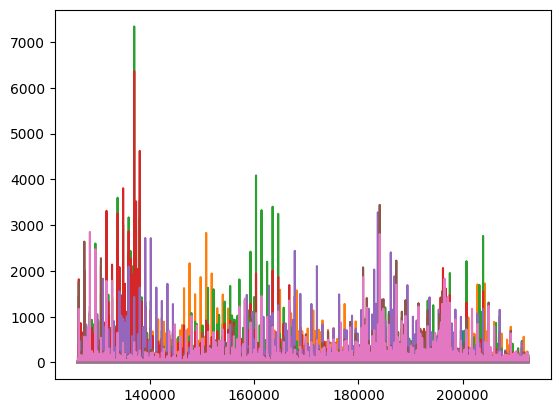

In [5]:
#df_train = df_train.groupby('case').head(400)

df1 = df_train.loc[df_train['case'].isin([1])]
P1 = df1["P1_FFT"]
df106 = df_train.loc[df_train['case'].isin([106])]
P106 = df106["P1_FFT"]
df154 = df_train.loc[df_train['case'].isin([154])]
P154 = df154["P1_FFT"]
plt.plot(df1)
plt.plot(df106)
plt.plot(df154)

c:\Users\umber\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


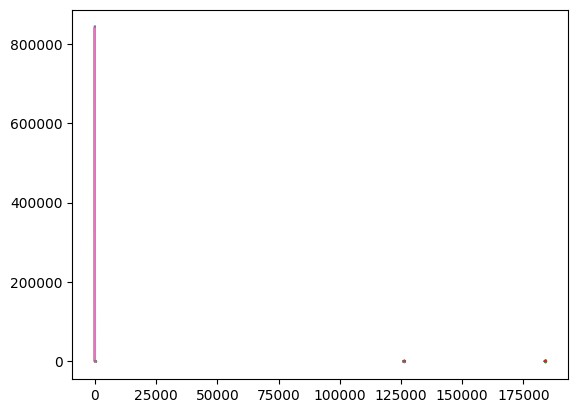

In [26]:
val = val.groupby('case').head(400)

df1 = val.loc[val['case'].isin([1])]
df106 = val.loc[val['case'].isin([106])]
df154 = val.loc[val['case'].isin([154])]
plt.plot(df1)
plt.plot(df106)
plt.plot(df154)

In [6]:
# ALLENAMENTO CON PEAKS
import numpy as np
import pywt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from scipy.fft import fft
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



from sklearn.metrics import classification_report
df = pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_train_finale.csv")
#df = df.groupby('Case').head(400)
df = pd.concat([df]*2, ignore_index=True)

x_test=pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_test_finale.csv")
df = df[["Case","Condition","P1","P2","P3","P4","P5","P6","P7"]]
#ALLENAMENTO MODELLO
test = x_test[["P1","P2","P3","P4","P5","P6","P7"]]
X=df[["P1","P2","P3","P4","P5","P6","P7"]]

df_train = pd.DataFrame()
peaks_train = {}


for colonna in X.columns:
    df_train[colonna+"_FFT"] = fft(X[colonna].values)

num_rows = len(df_train)
case_values = []
current_case = 1
for i in range(num_rows):
    case_values.append(current_case)
    if (i + 1) % 2402 == 0:
        current_case += 1

# Aggiungi la colonna "case" al dataframe
df_train['case'] = case_values

last_col_index = len(df_train.columns) - 1

for colonna in df_train.columns[:last_col_index]:
    peaks_train[colonna+"peaks"] = find_peaks(df_train[colonna]) #7 elementi con le posizioni

for colonna in df_train.columns[:last_col_index]:
    df_train[colonna] = df_train[colonna][peaks_train[colonna+"peaks"][0]]

df_train = df_train.fillna(0)
df_train = df_train.applymap(lambda x: np.real(x))
def replace_case(value):
    if value <= 105:
        return 0
    else:
        return 1

#df_train['case'] = df_train['case'].apply(replace_case)
#df_train = df_train[(df_train.iloc[:, :7] != 0).any(axis=1)]

percorso_file_excel = r'C:\Users\umber\Desktop\tabella.csv'

df_train.to_csv(percorso_file_excel, index=False)


c:\Users\umber\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:917: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.asarray(values, dtype=dtype)


In [ ]:
# ALLENAMENTO CON PEAKS con TEST SET

df_test = pd.DataFrame()
peaks_test = {}


for colonna in test.columns:
    df_test[colonna+"_FFT"] = fft(test[colonna].values)

num_rows_test = len(df_test)
case_values_test = []
current_case_test = 1
for i in range(num_rows_test):
    case_values_test.append(current_case_test)
    if (i + 1) % 2402 == 0: #CAMBIARE  
        current_case_test += 1

# Aggiungi la colonna "case" al dataframe
df_test['case'] = case_values_test



last_col_index_test = len(df_test.columns) - 1

for colonna in df_test.columns[:last_col_index_test]:
    peaks_test[colonna+"peaks"] = find_peaks(df_test[colonna]) #7 elementi con le posizioni

for colonna in df_test.columns[:last_col_index_test]:
    df_test[colonna] = df_test[colonna][peaks_test[colonna+"peaks"][0]]

df_test = df_test.fillna(0)
df_train = df_train.applymap(lambda x: np.real(x))

df_test = df_test[(df_test.iloc[:, :7] != 0).any(axis=1)]

test = df_test[["P1_FFT","P2_FFT","P3_FFT","P4_FFT","P5_FFT","P6_FFT","P7_FFT"]]
colonna = ["case"]

X = df_train [["P1_FFT","P2_FFT","P3_FFT","P4_FFT","P5_FFT","P6_FFT","P7_FFT"]]
y = df_train["case"]

model = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state=42)
model.fit(X, y)
predictions = model.predict(df_test)
test['Prediction'] = predictions
 
df_unito = pd.concat([colonna, test], axis=1)
grouped_data = df_unito.groupby('case')['Prediction'].apply(lambda x: x.mode().iat[0]).reset_index() # restituisce il valore più frequente (moda)
grouped_data

In [38]:
# PLOT FREQUENZA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from scipy.fft import fft



df = pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_train_finale.csv")
#df = df.groupby('Case').head(1200)
df1 = df.loc[df['Case'].isin([1])]
df106 = df.loc[df['Case'].isin([106])]
df154 = df.loc[df['Case'].isin([154])]

P1 = df1["P1"]
P106 = df106["P1"]
P154 = df154["P1"]


a = rfft(P1)
#peaks = find_peaks(a, threshold= 0.5)


#plt.plot(a[peaks[0]])
plt.plot(P1)

KeyError: 'ALIGNED'